In [6]:
path = 'D:\\Travail\\Polytech 5A\\STAGE\\EGG Analysis\\wagtailSite1\\mysite\\media\\uploads\\icet0\\exp3\\20230515_patient_id.csv'

# Trouver l'index du dernier '/'
last_slash_index = path.rfind('/')

print(last_slash_index)
# Enlever le dernier '/'
path_without_last_slash = path[:last_slash_index]
print(path_without_last_slash)
# Ajouter 'mat/mymat.mat' à la fin du chemin
new_path = path_without_last_slash + '/mat/mymat.mat'

print(new_path)


-1
D:\Travail\Polytech 5A\STAGE\EGG Analysis\wagtailSite1\mysite\media\uploads\icet0\exp3\20230515_patient_id.cs
D:\Travail\Polytech 5A\STAGE\EGG Analysis\wagtailSite1\mysite\media\uploads\icet0\exp3\20230515_patient_id.cs/mat/mymat.mat


In [1]:
import scipy.io as sio

# Charger le fichier .mat
data = sio.loadmat('mysite/media/uploads/icet0/exp7/mat/images_time.mat')


In [2]:
data['img'].shape

(7, 9, 3, 32, 32)

In [5]:
import matplotlib.pyplot as plt

print(data['img'][0][0].shape)


(3, 32, 32)


In [19]:
loc = sio.loadmat('mysite/media/uploads/icet0/exp7/mat/locs.mat')
loc

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Wed May 24 13:45:44 2023',
 '__version__': '1.0',
 '__globals__': [],
 'locs': array([[-0.0548397,  0.0685722, -0.01059  ],
        [ 0.0557433,  0.0696568, -0.010755 ],
        [-0.0856192, -0.0465147, -0.045707 ],
        [ 0.0861618, -0.0470353, -0.045869 ]])}

(7, 3, 32, 32)


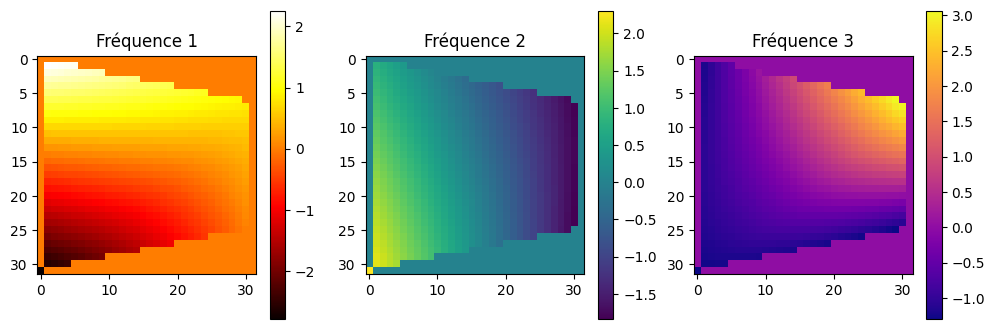

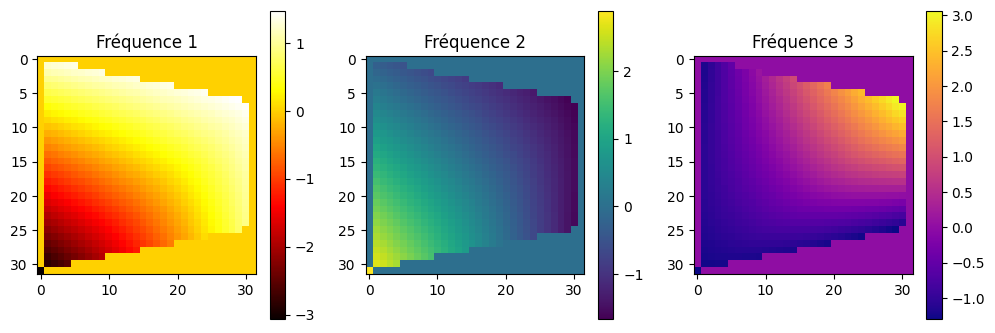

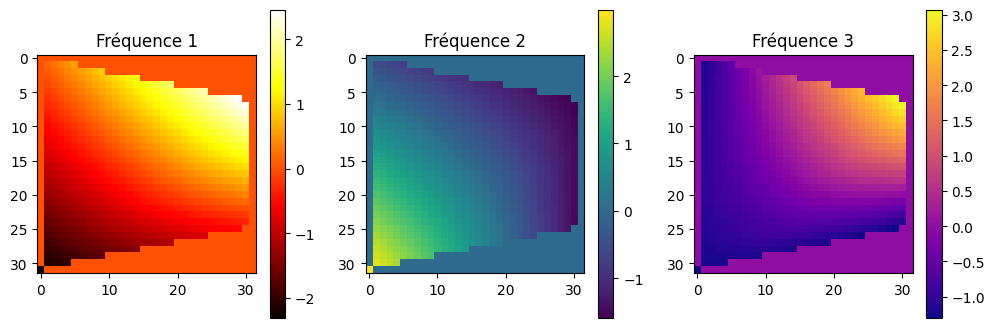

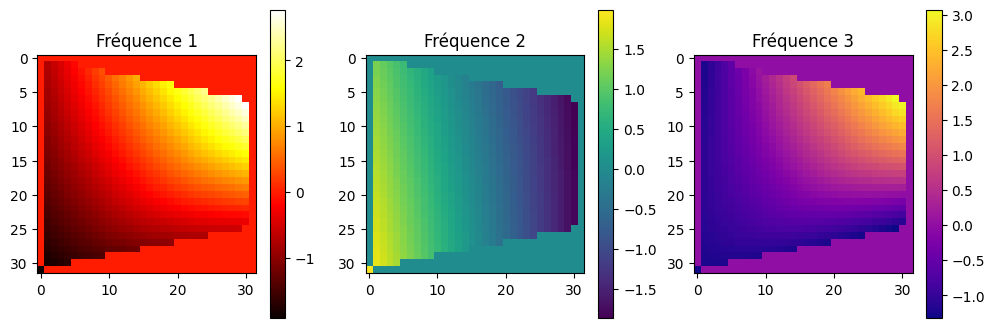

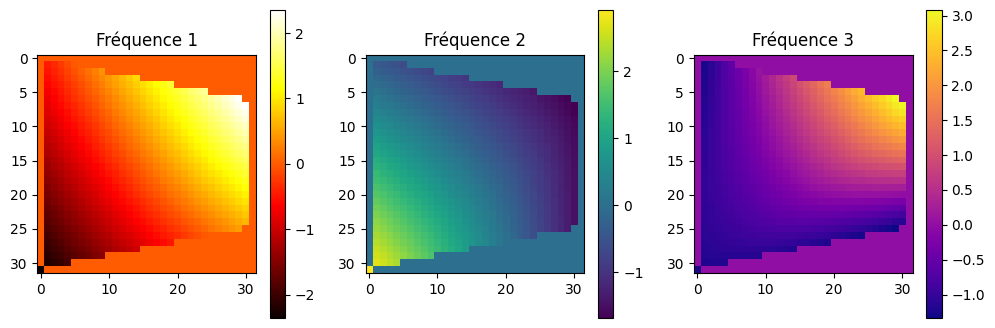

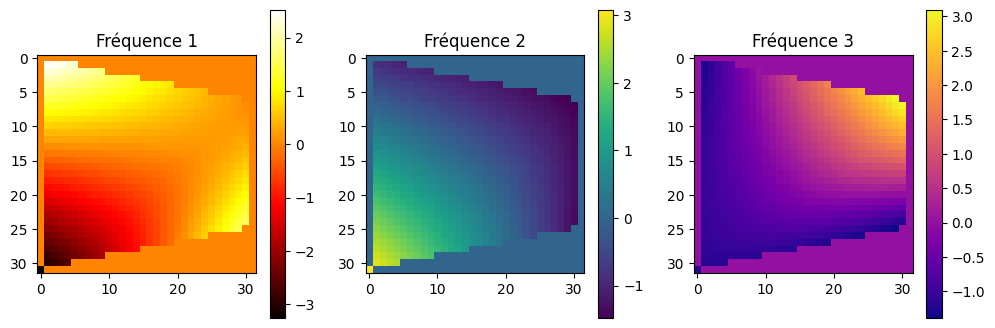

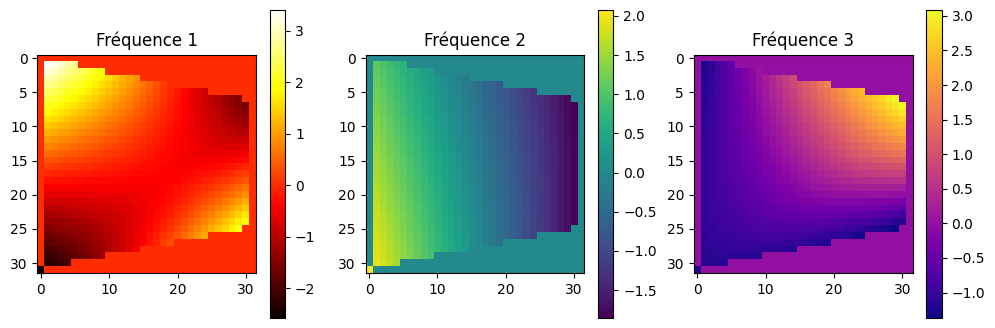

In [20]:
import numpy as np


images = data['img']
mean_result = np.mean(images, axis=1)
print(mean_result.shape)
for i in range(mean_result.shape[0]):
        image = mean_result[i]
        # Afficher les cartes de chaleur pour chaque fréquence
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
        cmap_index = 0
        cmap_label = ['hot','viridis','plasma']
        for i, ax in enumerate(axes.flat):
            # Récupérer la matrice d'une fréquence
            freq = image[i, :, :]
            # Afficher la carte de chaleur de la fréquence
            im = ax.imshow(freq, cmap=cmap_label[cmap_index])
            cmap_index = cmap_index+1
            # Ajouter une barre de couleur pour la carte de chaleur
            fig.colorbar(im, ax=ax)
            ax.set_title('Fréquence {}'.format(i+1))

plt.show()

In [7]:
mystr = "D:\\Travail\\Polytech 5A\\STAGE\EGG Analysis\\wagtailSite1\\mysite\\media\\uploads\\icet0\\exp7\\iozrcr"

In [8]:
mystr.find("exp")

82

In [10]:
mystr[mystr.find("exp")+3:mystr.find("exp")+4]

'7'

# Partie visualisation MNE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne

root = mne.datasets.sample.data_path() / "MEG" / "sample"
raw_file = root / "sample_audvis_filt-0-40_raw.fif"
raw = mne.io.read_raw_fif(raw_file, preload=False)

events_file = root / "sample_audvis_filt-0-40_raw-eve.fif"
events = mne.read_events(events_file)

raw.crop(tmax=90)  # in seconds (happens in-place)
# discard events >90 seconds (not strictly necessary, but avoids some warnings)
events = events[events[:, 0] <= raw.last_samp]

Opening raw data file C:\Users\Icet0\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


In [1]:
raw.pick(["eeg", "eog"]).load_data()
raw.info

NameError: name 'raw' is not defined

In [ ]:
raw.info.get_montage()

<DigMontage | 78 extras (headshape), 4 HPIs, 3 fiducials, 60 channels>

### Channel names and types


In [ ]:
channel_renaming_dict = {name: name.replace(" 0", "").lower() for name in raw.ch_names}
_ = raw.rename_channels(channel_renaming_dict)  # happens in-place

### Channel locations


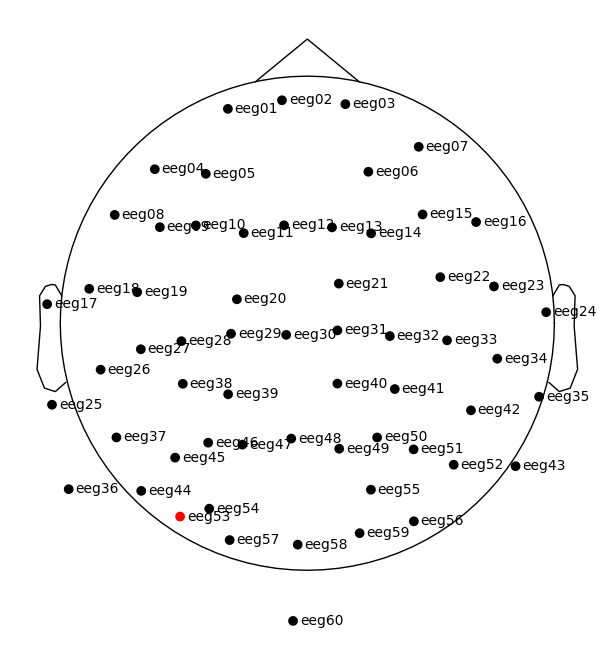

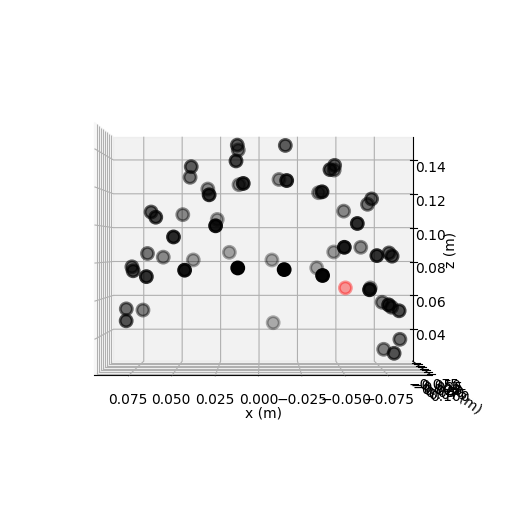

In [ ]:
raw.plot_sensors(show_names=True)
fig = raw.plot_sensors("3d")

### Setting the EEG reference


Using matplotlib as 2D backend.


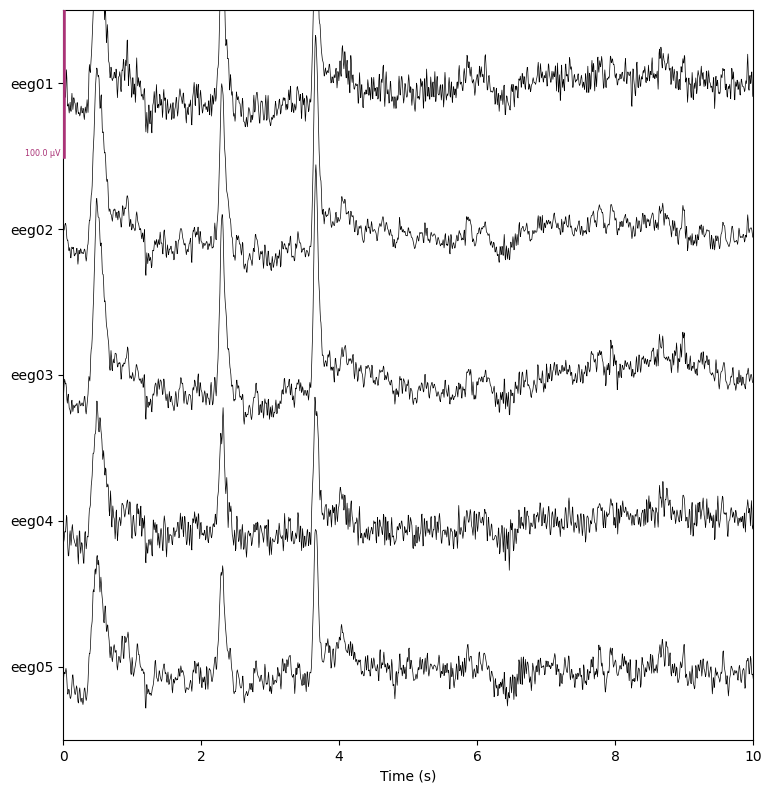

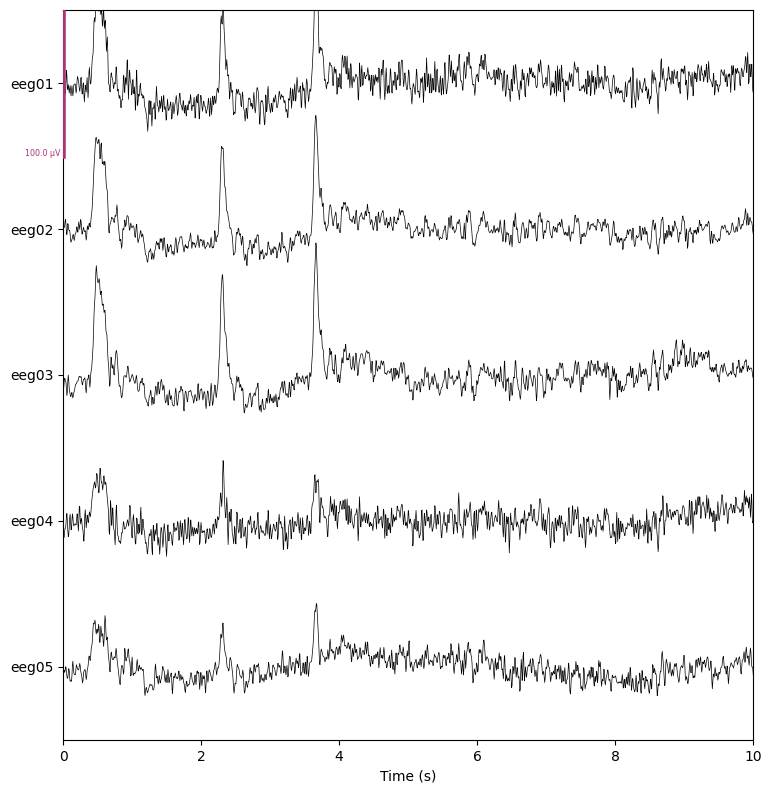

In [ ]:
for proj in (False, True):
    with mne.viz.use_browser_backend("matplotlib"):
        fig = raw.plot(
            n_channels=5, proj=proj, scalings=dict(eeg=50e-6), show_scrollbars=False
        )
    fig.subplots_adjust(top=0.9)  # make room for title
    ref = "Average" if proj else "No"
    fig.suptitle(f"{ref} reference", size="xx-large", weight="bold")

### Filtering

In [ ]:
raw.filter(l_freq=0.1, h_freq=None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 4957 samples (33.013 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished


<Raw | sample_audvis_filt-0-40_raw.fif, 61 x 13515 (90.0 s), ~9.2 MB, data loaded>

### Evoked responses: epoching and averaging


In [ ]:
np.unique(events[:, -1])

array([ 1,  2,  3,  4,  5, 32])

In [ ]:
event_dict = {
    "auditory/left": 1,
    "auditory/right": 2,
    "visual/left": 3,
    "visual/right": 4,
    "face": 5,
    "buttonpress": 32,
}

Not setting metadata
132 matching events found
Setting baseline interval to [-0.2996928197375818, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 132 events and 151 original time points ...
1 bad epochs dropped
You seem to have overlapping epochs. Some event lines may be duplicated in the plot.


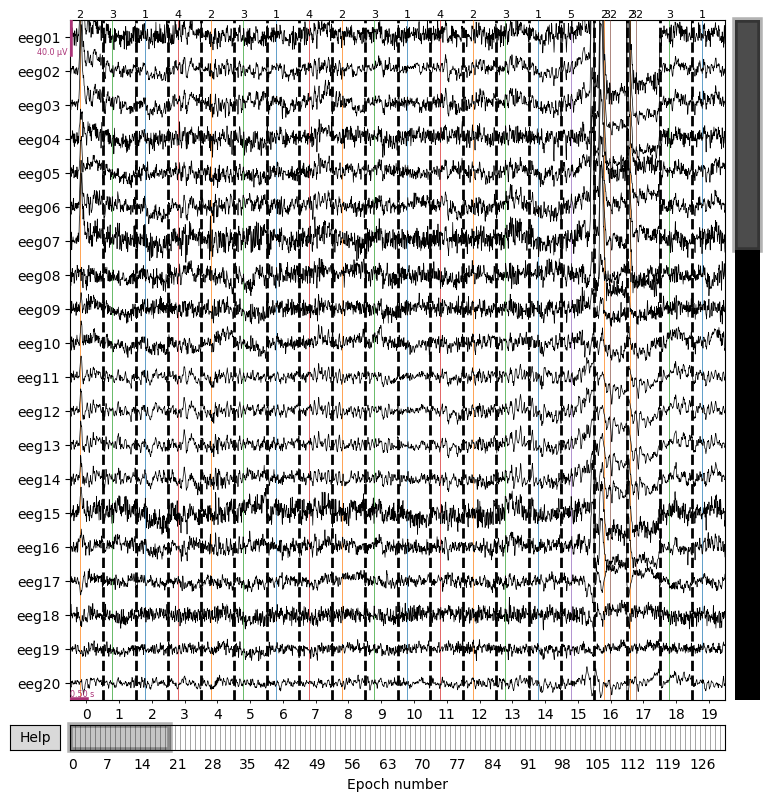

In [ ]:
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.3, tmax=0.7, preload=True)
fig = epochs.plot(events=events)

    Rejecting  epoch based on EEG : ['eeg03']
    Rejecting  epoch based on EEG : ['eeg01', 'eeg02', 'eeg03', 'eeg04', 'eeg06', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg01', 'eeg02', 'eeg03', 'eeg04', 'eeg06', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg01', 'eeg02', 'eeg03', 'eeg04', 'eeg06', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg01', 'eeg02', 'eeg03', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg01', 'eeg02', 'eeg03', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg01']
    Rejecting  epoch based on EEG : ['eeg03', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg03', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg07']
    Rejecting  epoch based on EEG : ['eeg03', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg03', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg07']
    Rejecting  epoch based on EEG : ['eeg07']
    Rejecting  epoch based on EEG : ['eeg03']
    Rejecting  epoch based on EEG : ['eeg25']
    Rejecting  epoch based on EEG : ['e

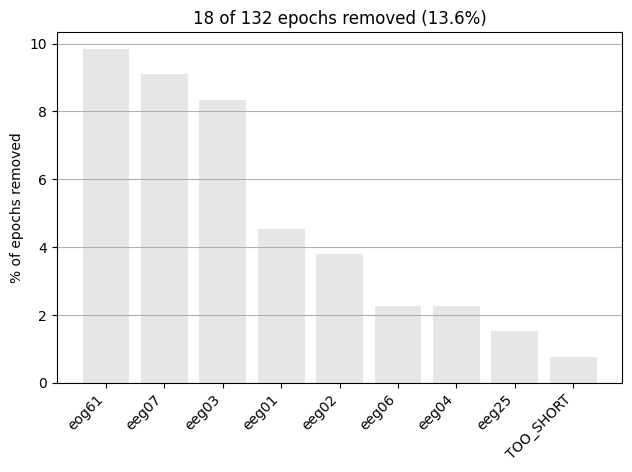

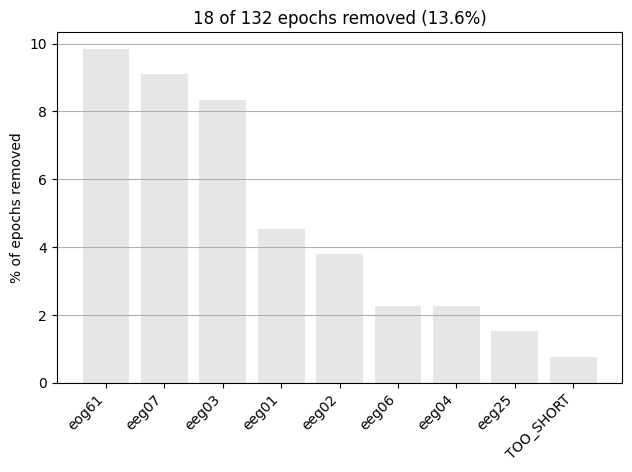

In [ ]:
reject_criteria = dict(eeg=100e-6, eog=200e-6)  # 100 µV, 200 µV
epochs.drop_bad(reject=reject_criteria)

epochs.plot_drop_log()


In [ ]:
l_aud = epochs["auditory/left"].average()
l_vis = epochs["visual/left"].average()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


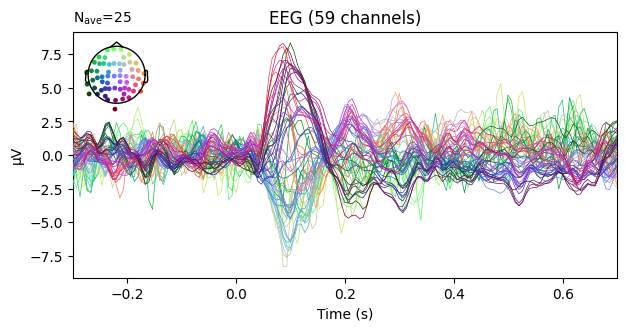

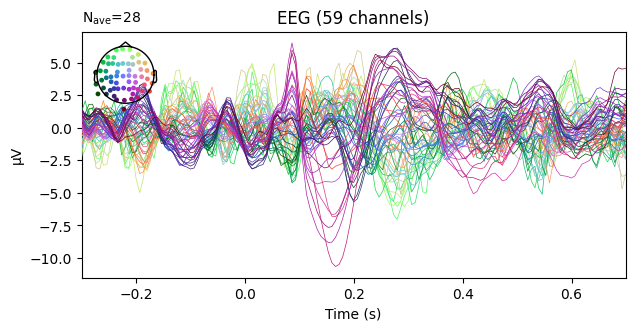

In [ ]:
fig1 = l_aud.plot()
fig2 = l_vis.plot(spatial_colors=True)

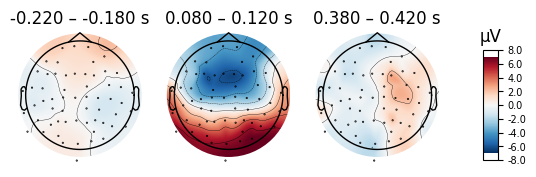

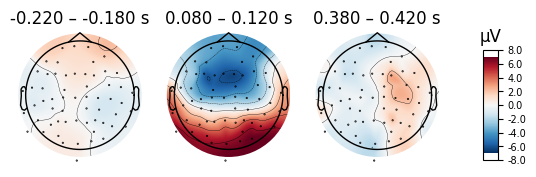

In [ ]:
l_aud.plot_topomap(times=[-0.2, 0.1, 0.4], average=0.05)

Projections have already been applied. Setting proj attribute to True.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


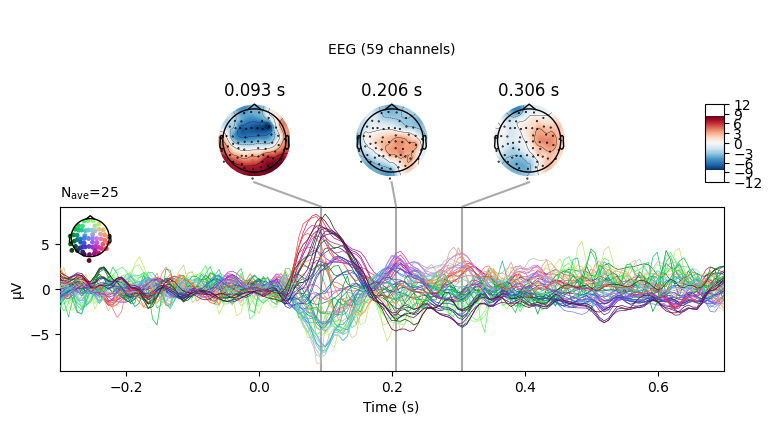

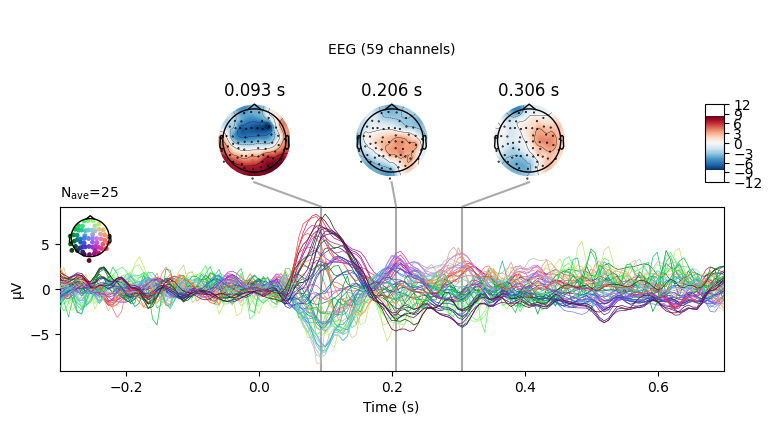

In [ ]:
l_aud.plot_joint()

### Global field power (GFP)


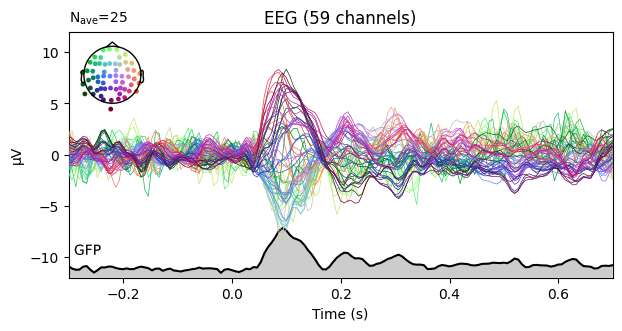

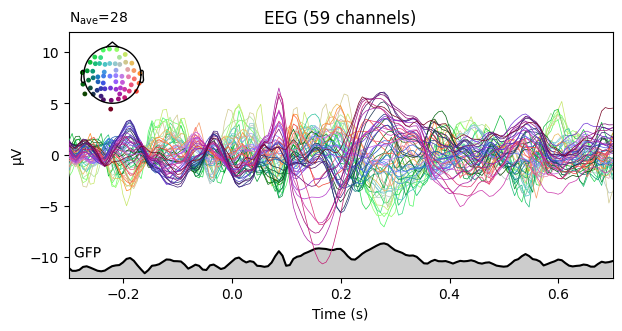

In [ ]:
for evk in (l_aud, l_vis):
    evk.plot(gfp=True, spatial_colors=True, ylim=dict(eeg=[-12, 12]))

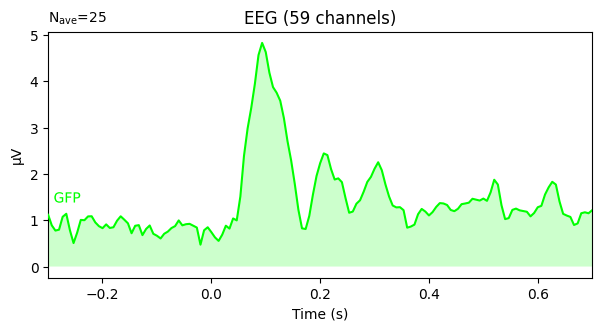

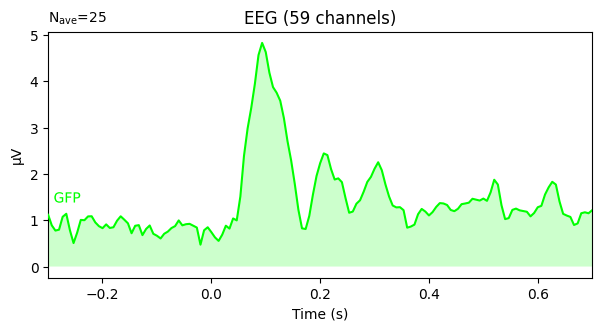

In [ ]:
l_aud.plot(gfp="only")

In [ ]:
gfp = l_aud.data.std(axis=0, ddof=0)

# Reproducing the MNE-Python plot style seen above
fig, ax = plt.subplots()
ax.plot(l_aud.times, gfp * 1e6, color="lime")
ax.fill_between(l_aud.times, gfp * 1e6, color="lime", alpha=0.2)
ax.set(xlabel="Time (s)", ylabel="GFP (µV)", title="EEG")


[Text(0.5, 0, 'Time (s)'), Text(0, 0.5, 'GFP (µV)'), Text(0.5, 1.0, 'EEG')]

### Averaging across channels with regions of interest


In [ ]:
left = ["eeg17", "eeg18", "eeg25", "eeg26"]
right = ["eeg23", "eeg24", "eeg34", "eeg35"]

left_ix = mne.pick_channels(l_aud.info["ch_names"], include=left)
right_ix = mne.pick_channels(l_aud.info["ch_names"], include=right)

Applying baseline correction (mode: mean)
['left_ROI', 'right_ROI']


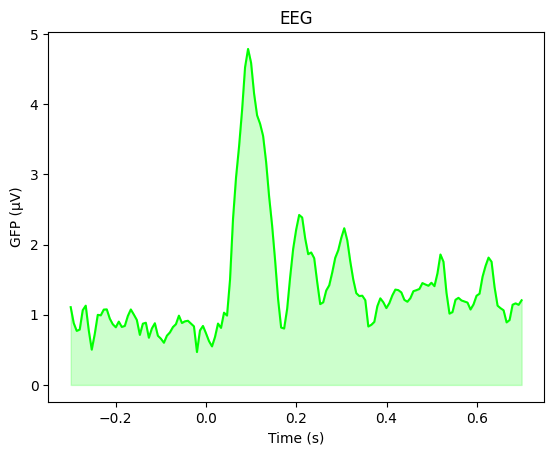

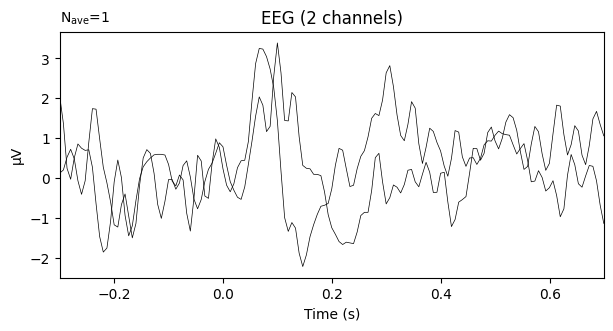

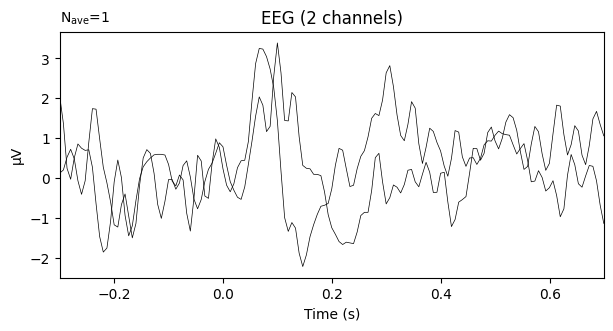

In [ ]:
roi_dict = dict(left_ROI=left_ix, right_ROI=right_ix)
roi_evoked = mne.channels.combine_channels(l_aud, roi_dict, method="mean")
print(roi_evoked.info["ch_names"])
roi_evoked.plot()

### Comparing conditions


combining channels using "mean"
combining channels using "mean"


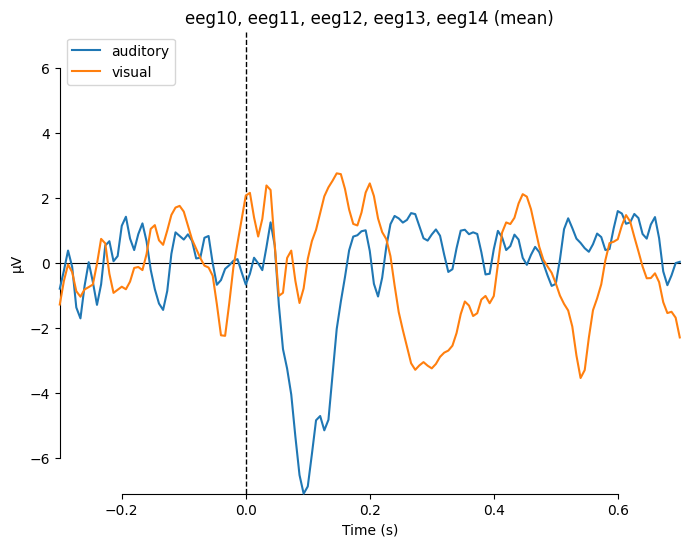

[<Figure size 800x600 with 1 Axes>]

In [ ]:
evokeds = dict(auditory=l_aud, visual=l_vis)
picks = [f"eeg{n}" for n in range(10, 15)]
mne.viz.plot_compare_evokeds(evokeds, picks=picks, combine="mean")

combining channels using "mean"
combining channels using "mean"


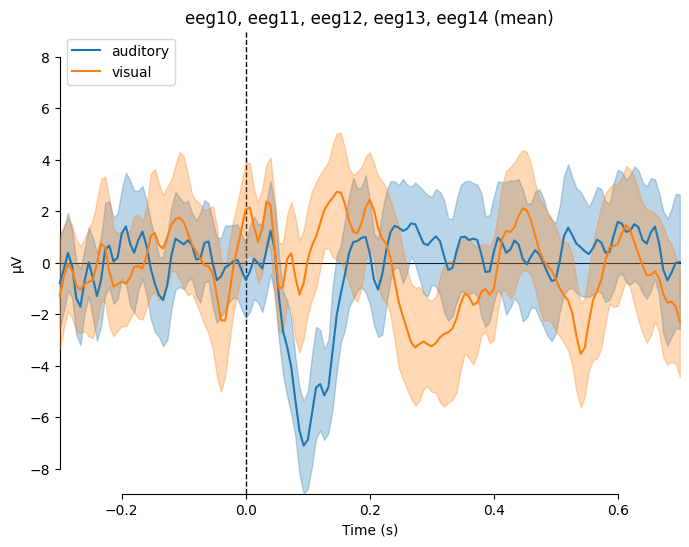

[<Figure size 800x600 with 1 Axes>]

In [ ]:
evokeds = dict(
    auditory=list(epochs["auditory/left"].iter_evoked()),
    visual=list(epochs["visual/left"].iter_evoked()),
)
mne.viz.plot_compare_evokeds(evokeds, combine="mean", picks=picks)

Projections have already been applied. Setting proj attribute to True.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


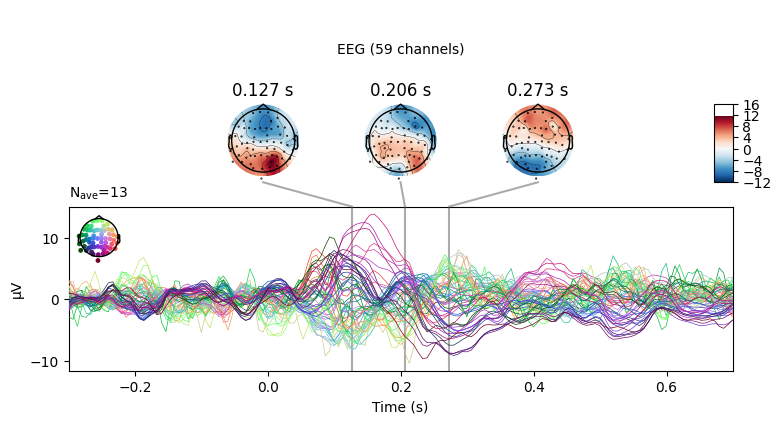

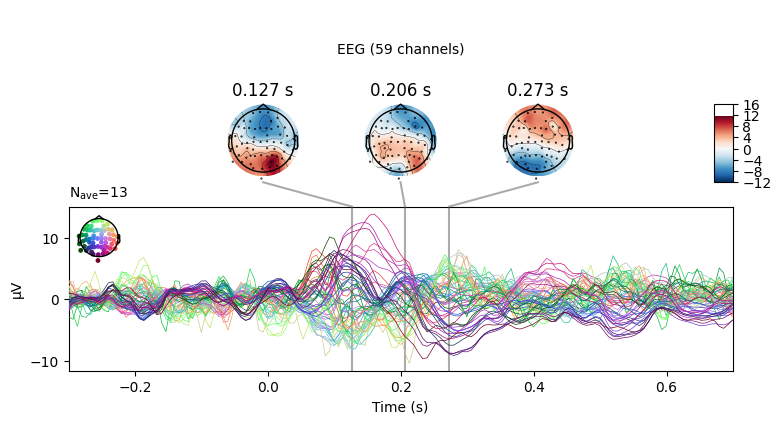

In [ ]:
aud_minus_vis = mne.combine_evoked([l_aud, l_vis], weights=[1, -1])
aud_minus_vis.plot_joint()


### Grand averages


In [ ]:
grand_average = mne.grand_average([l_aud, l_vis])
print(grand_average)

Interpolating bad channels
    Automatic origin fit: head of radius 91.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 91.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 1 sensors
Identifying common channels ...
<Evoked | 'Grand average (n = 2)' (average, N=2), -0.29969 – 0.69928 s, baseline -0.299693 – 0 s, 60 ch, ~3.0 MB>


In [ ]:
list(event_dict)

['auditory/left',
 'auditory/right',
 'visual/left',
 'visual/right',
 'face',
 'buttonpress']

In [ ]:
epochs["auditory"].average()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<Evoked | '0.48 × auditory/left + 0.52 × auditory/right' (average, N=52), -0.29969 – 0.69928 s, baseline -0.299693 – 0 s, 60 ch, ~3.0 MB>

## PASSAGE DE NOTRE DONNEES A MNE

In [14]:
import pandas as pd
import numpy as np

In [15]:
path = "mysite/media/uploads/icet0/exp7/20230524_dataTestGOOD_2.csv"
df = pd.read_csv(path, sep=",")
df

TP9     AF7      AF8    TP10
0     -4.883  26.855   82.520 -56.641
1     -7.324  28.809  -28.809 -64.453
2     -6.836  23.438  -69.824 -70.312
3     -6.348  24.414  122.559 -69.824
4     -8.789  32.715  126.465 -58.105
...      ...     ...      ...     ...
2395 -14.648  33.691   70.312 -59.570
2396  -5.371  37.598  130.371 -46.875
2397  -7.324  38.574  135.742 -33.203
2398  -8.301  41.016   -4.395 -39.551
2399  -5.371  40.039  -19.531 -51.270

[2400 rows x 4 columns]

In [39]:
rajoutTime = np.arange(0, 60 , 60/df.shape[0])
df["Time"] = rajoutTime

In [40]:
df

TP9     AF7      AF8    TP10    Time
0     -4.883  26.855   82.520 -56.641   0.000
1     -7.324  28.809  -28.809 -64.453   0.025
2     -6.836  23.438  -69.824 -70.312   0.050
3     -6.348  24.414  122.559 -69.824   0.075
4     -8.789  32.715  126.465 -58.105   0.100
...      ...     ...      ...     ...     ...
2395 -14.648  33.691   70.312 -59.570  59.875
2396  -5.371  37.598  130.371 -46.875  59.900
2397  -7.324  38.574  135.742 -33.203  59.925
2398  -8.301  41.016   -4.395 -39.551  59.950
2399  -5.371  40.039  -19.531 -51.270  59.975

[2400 rows x 5 columns]

In [46]:

ch_names = df.columns[:-1]
ch_names.tolist()

['TP9', 'AF7', 'AF8', 'TP10']

In [139]:
data = {
    ch_name: df[ch_name].values
    for ch_name in ch_names
}

In [140]:
data

{'TP9': array([-4.883, -7.324, -6.836, ..., -7.324, -8.301, -5.371]),
 'AF7': array([26.855, 28.809, 23.438, ..., 38.574, 41.016, 40.039]),
 'AF8': array([ 82.52 , -28.809, -69.824, ..., 135.742,  -4.395, -19.531]),
 'TP10': array([-56.641, -64.453, -70.312, ..., -33.203, -39.551, -51.27 ])}

In [141]:
from mne import create_info
import datetime
sfreq = 250  # Fréquence d'échantillonnage en Hz

info = create_info(ch_names.tolist(), sfreq, ch_types='eeg')
info.set_montage('standard_1020')
info

<Info | 8 non-empty values
 bads: []
 ch_names: TP9, AF7, AF8, TP10
 chs: 4 EEG
 custom_ref_applied: False
 dig: 7 items (3 Cardinal, 4 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 4
 projs: []
 sfreq: 250.0 Hz
>

In [142]:
data = np.array(list(data.values()))


In [177]:
import datetime
import pytz
import mne


# Get the current date and time
current_datetime = datetime.datetime.now()

# Convert the current datetime to UTC
utc_timezone = pytz.timezone('UTC')
current_utc_datetime = current_datetime.astimezone(utc_timezone)

# Convert the UTC datetime to a UNIX timestamp
unix_timestamp = current_utc_datetime.timestamp()

raw = mne.io.RawArray(data, info=info)
raw.set_meas_date(unix_timestamp)  # Year, month, day, hour, minute, second
raw.time_as_index(df['Time'].values)
raw

Creating RawArray with float64 data, n_channels=4, n_times=2400
    Range : 0 ... 2399 =      0.000 ...     9.596 secs
Ready.


<RawArray | 4 x 2400 (9.6 s), ~87 kB, data loaded>

### RAW DATA OK !


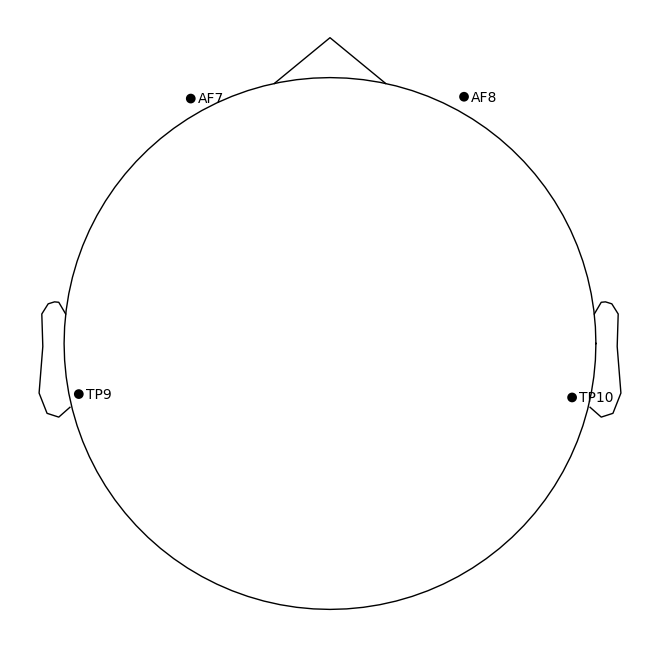

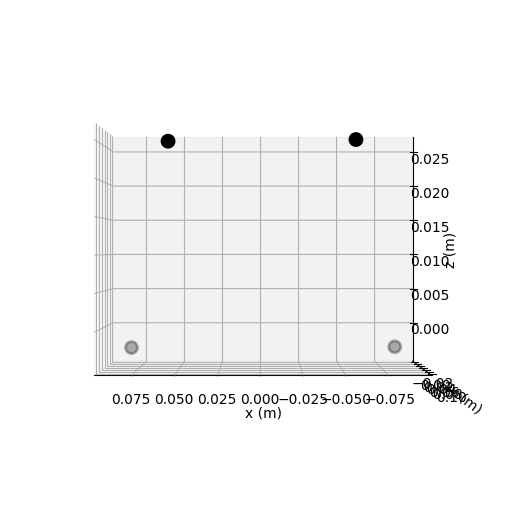

In [166]:
raw.plot_sensors(show_names=True)
fig = raw.plot_sensors("3d")

In [173]:
len(ch_names)

4

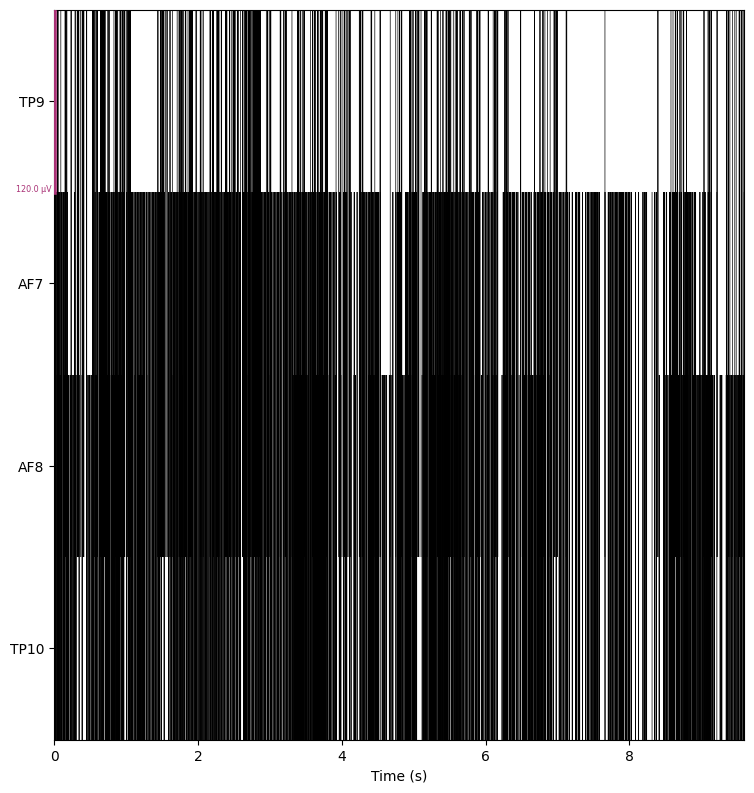

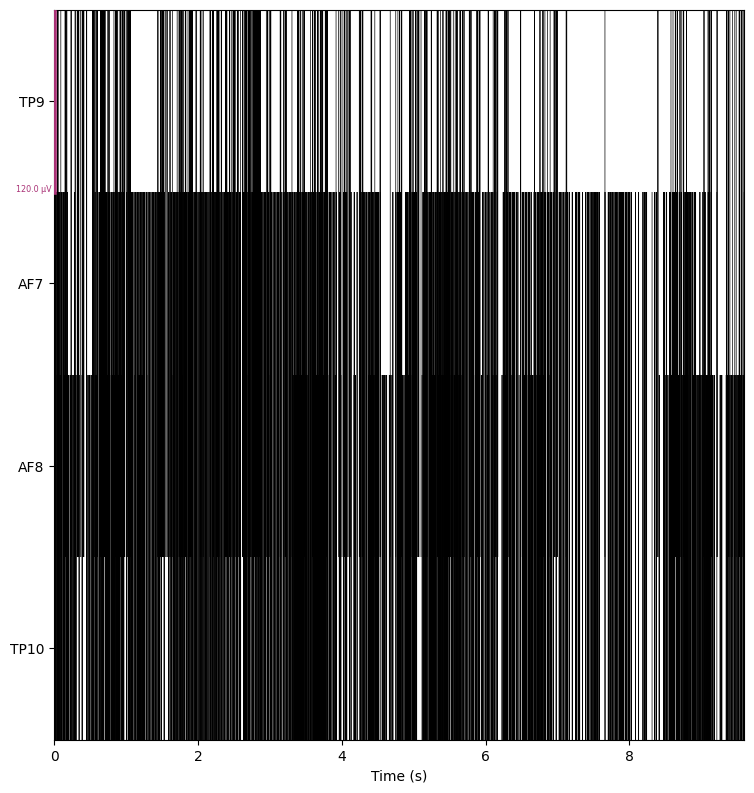

In [176]:
for proj in (False, True):
    with mne.viz.use_browser_backend("matplotlib"):
        fig = raw.plot(
            n_channels=len(ch_names), proj=proj, scalings=dict(eeg=60e-6), show_scrollbars=False
        )
    fig.subplots_adjust(top=0.9)  # make room for title
    ref = "Average" if proj else "No"
    fig.suptitle(f"{ref} reference", size="xx-large", weight="bold")

In [146]:
raw.filter(l_freq=0.1, h_freq=None)


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8251 samples (33.004 s)



C:\Users\Icet0\AppData\Local\Temp\ipykernel_2164\1338157135.py:1: RuntimeWarning: filter_length (8251) is longer than the signal (2400), distortion is likely. Reduce filter length or filter a longer signal.
  raw.filter(l_freq=0.1, h_freq=None)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


<RawArray | 4 x 2400 (9.6 s), ~87 kB, data loaded>

Effective window size : 8.192 (s)


d:\Travail\Polytech 5A\STAGE\EGG Analysis\wagtailSite1\.venv\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


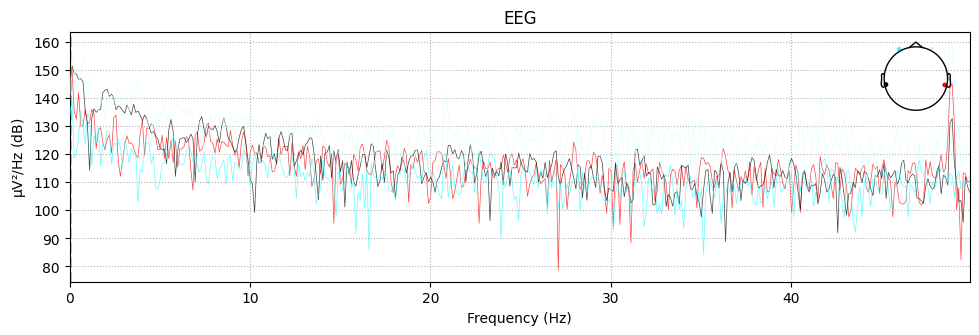

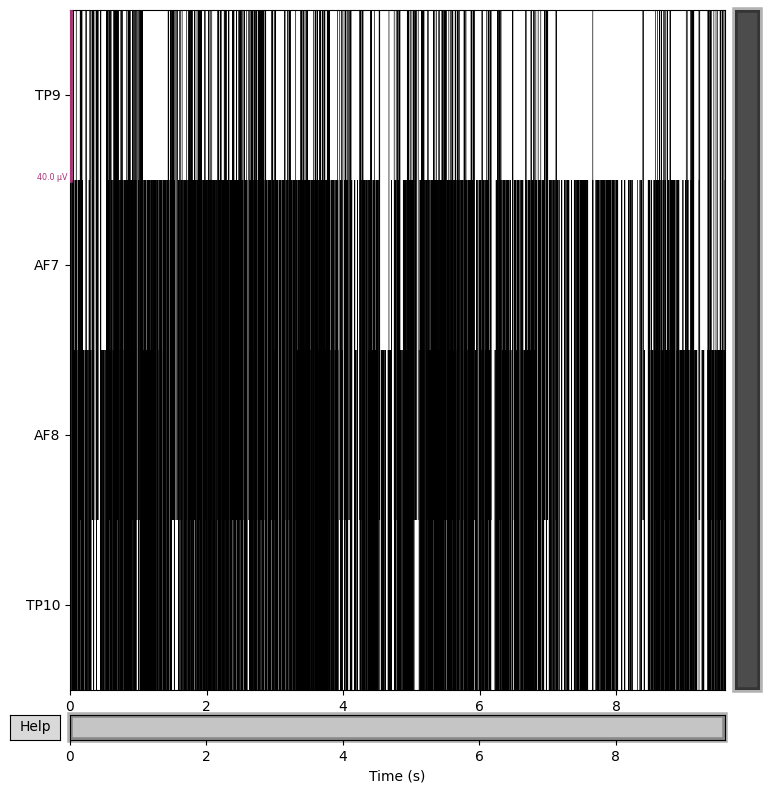

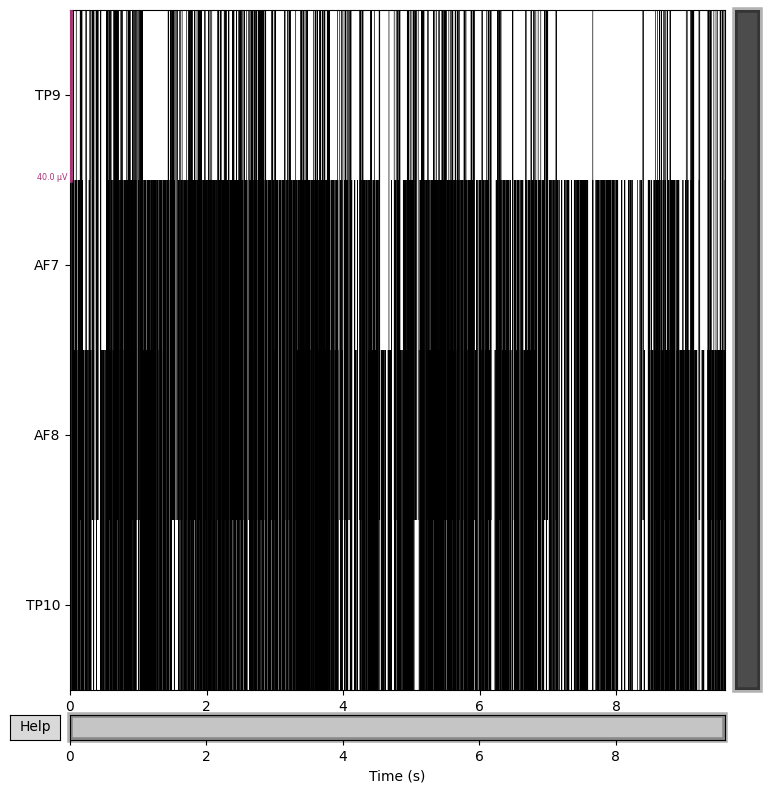

In [179]:
raw.compute_psd(fmax=50).plot(picks="data", exclude="bads")
raw.plot(duration=60, n_channels=4)


Fitting ICA to data using 4 channels (please be patient, this may take a while)
Selecting by number: 4 components
Fitting ICA took 0.0s.


C:\Users\Icet0\AppData\Local\Temp\ipykernel_2164\3573225575.py:3: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
4 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
4 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
4 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
4 matching events found
No baseline correction applied
0 projection items activated


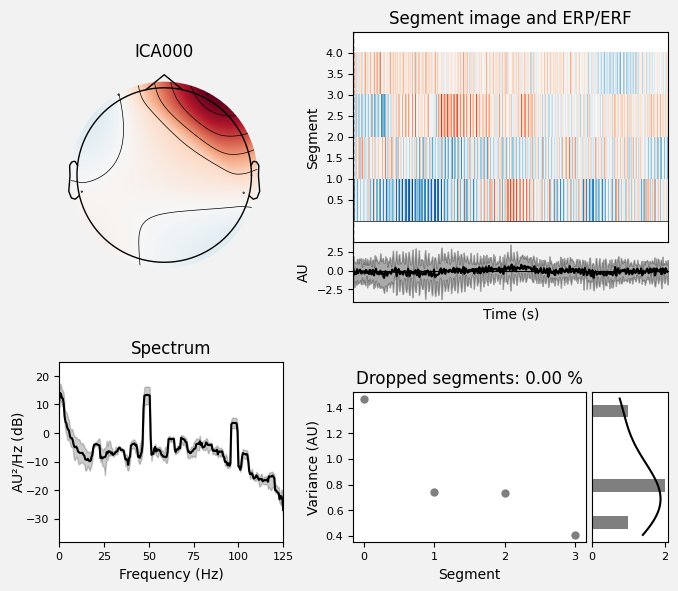

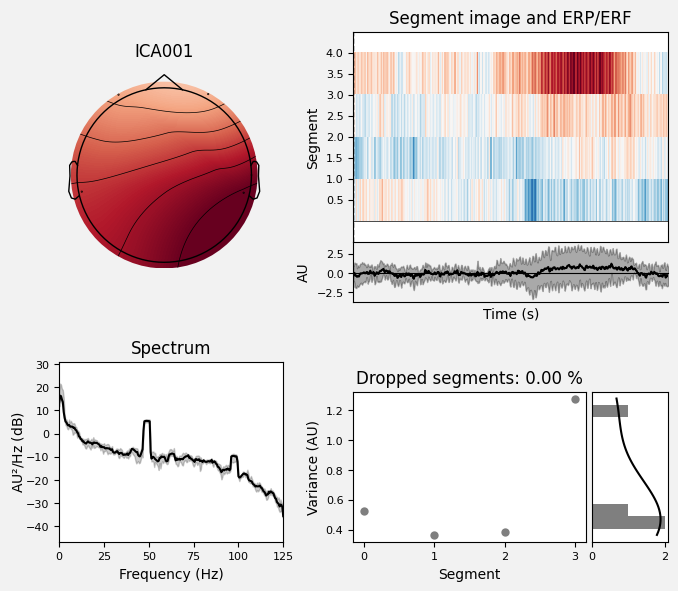

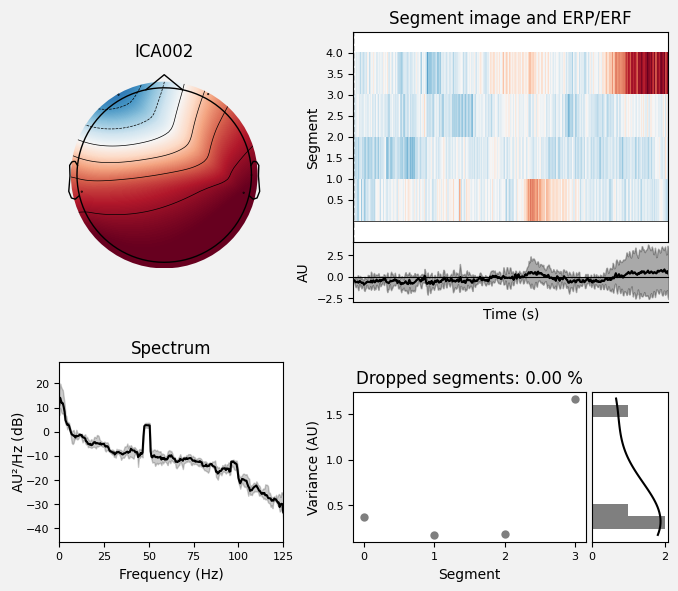

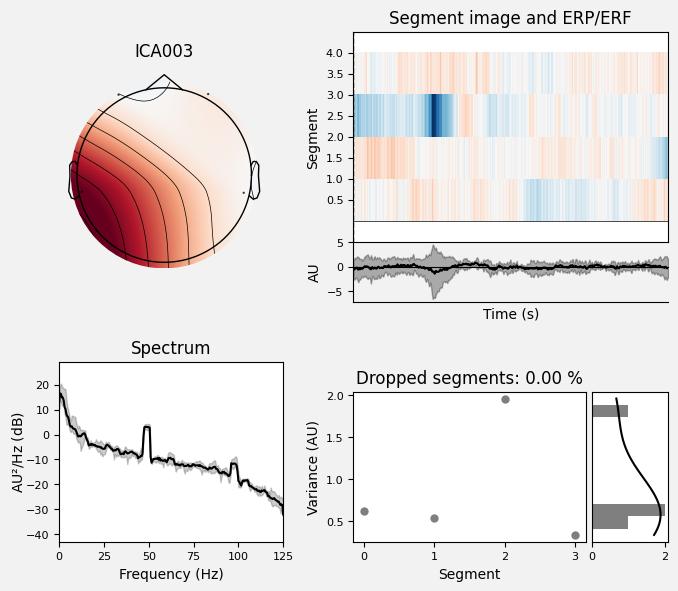

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [186]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=4, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [0,1,2, 3]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

In [196]:
frequencies = np.arange(7, 30, 3)
power = mne.time_frequency.tfr_morlet(
    raw, n_cycles=2, return_itc=False, freqs=frequencies, decim=3
)
power.plot(["MEG 1332"])

TypeError: inst must be Epochs or Evoked

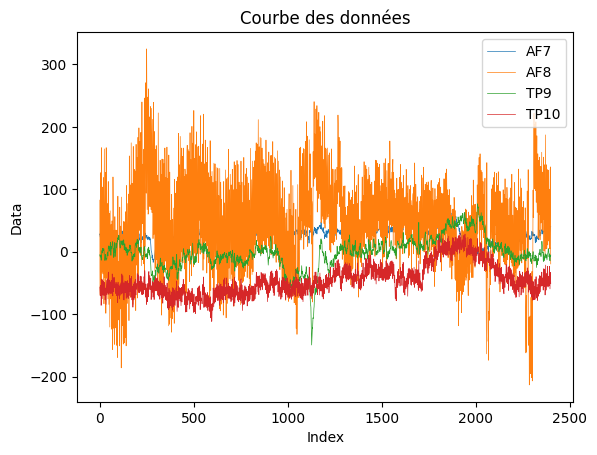

In [212]:

import matplotlib.pyplot as plt
x = df.index  # Valeurs x correspondant aux indices du DataFrame
y1 = df['AF7']  # Valeurs y à partir de la colonne "Data"
y2 = df['AF8']  # Valeurs y à partir de la colonne "Data"
y3 = df['TP9']  # Valeurs y à partir de la colonne "Data"
y4 = df['TP10']  # Valeurs y à partir de la colonne "Data"
# Tracer les courbes

plt.plot(x, y1, label='AF7',linewidth=0.5)
plt.plot(x, y2, label='AF8',linewidth=0.5)
plt.plot(x, y3, label='TP9',linewidth=0.5)
plt.plot(x, y4, label='TP10',linewidth=0.5)
plt.xlabel('Index')
plt.ylabel('Data')
plt.title('Courbe des données')
plt.legend()
plt.show()
plt.close()

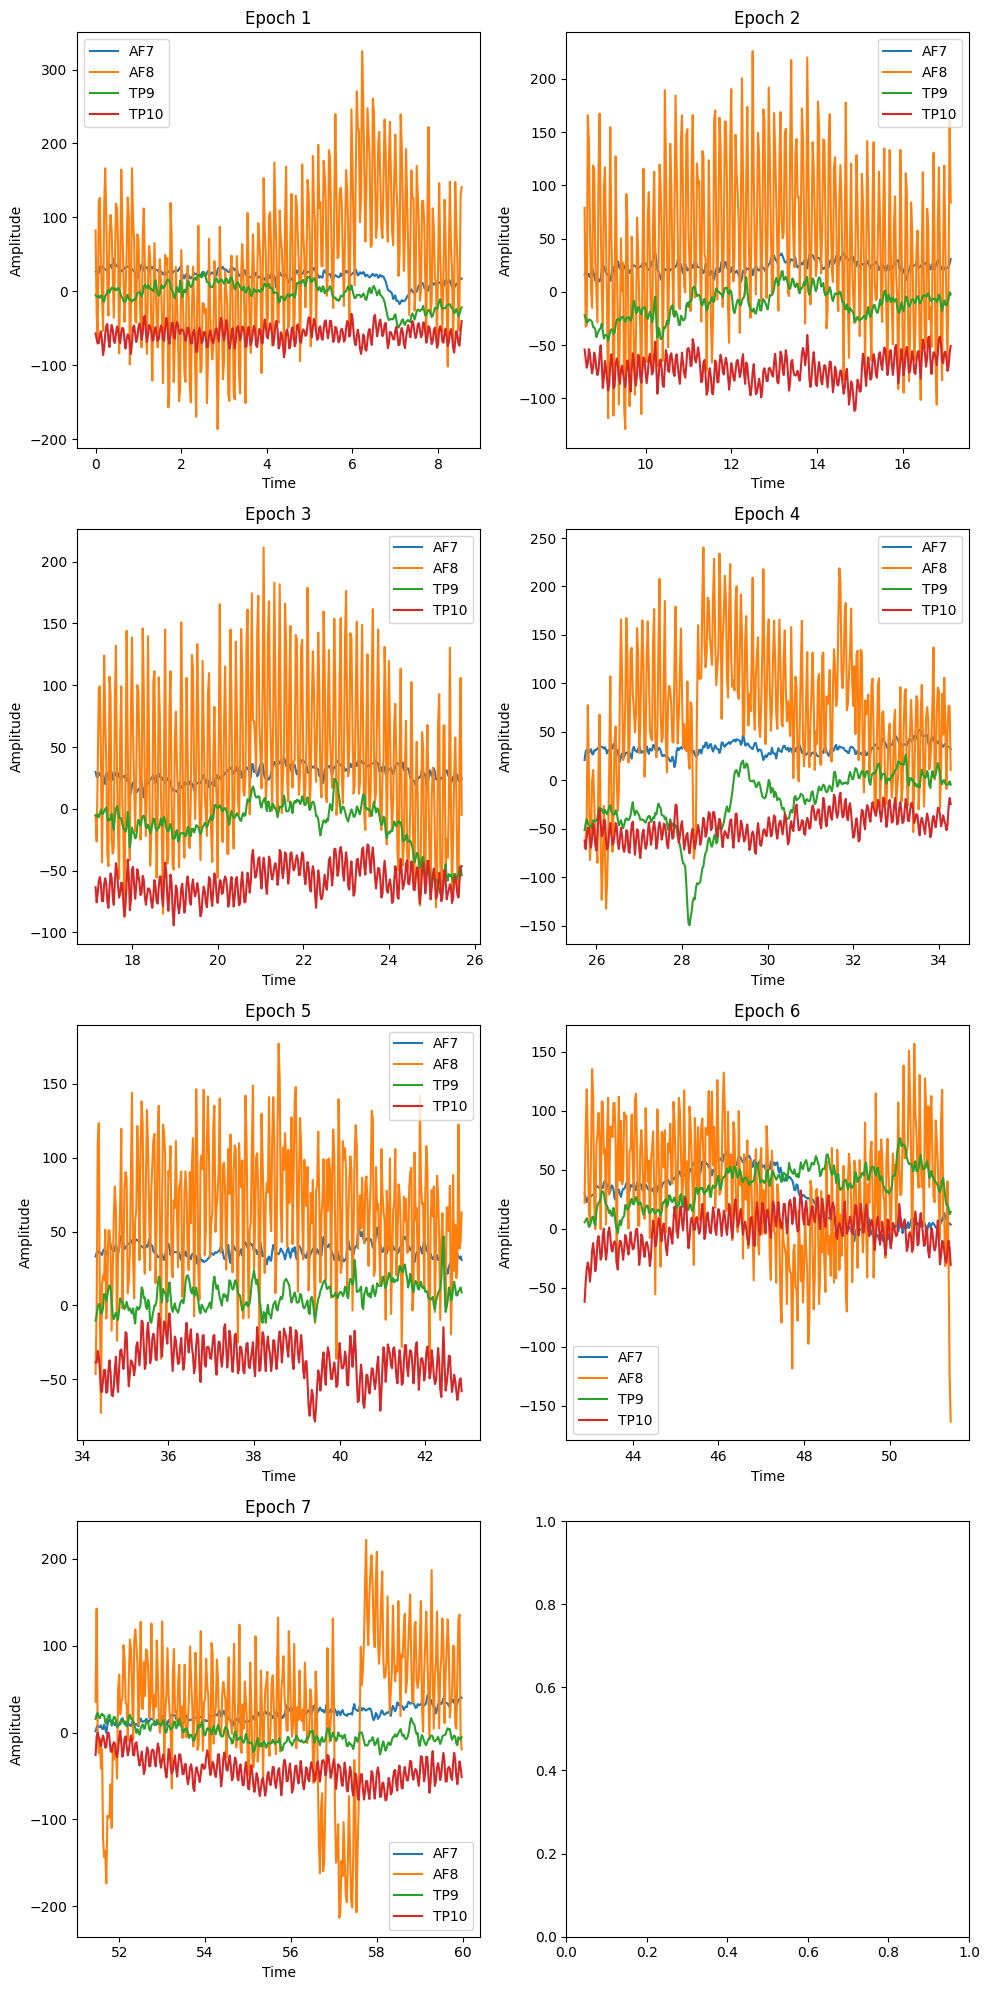

In [225]:
n_epochs = 7  # Nombre d'epochs souhaité

# Diviser le DataFrame en n epochs
epochs = np.array_split(df, n_epochs)
n_cols = 2  # Nombre d'images par colonne
n_rows = (n_epochs + n_cols - 1) // n_cols  # Nombre de lignes nécessaires

fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, n_rows*5))  # Crée une grille de sous-graphiques

# Parcourez les epochs et tracez les courbes correspondantes dans les sous-graphiques
for i, epoch in enumerate(epochs):
    row = i // n_cols
    col = i % n_cols
    axs[row, col].plot(epoch['Time'], epoch['AF7'], label='AF7')
    axs[row, col].plot(epoch['Time'], epoch['AF8'], label='AF8')
    axs[row, col].plot(epoch['Time'], epoch['TP9'], label='TP9')
    axs[row, col].plot(epoch['Time'], epoch['TP10'], label='TP10')
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Amplitude')
    axs[row, col].set_title(f'Epoch {i+1}')
    axs[row, col].legend()
plt.tight_layout()  # Ajuste automatiquement les espacements entre les sous-graphiques
plt.show()
plt.close()

In [227]:
import scipy.io
path = "mysite/media/uploads/icet0/exp7/mat/donnees_eeg.mat"
mat = scipy.io.loadmat(path)


In [230]:
matData = mat["data"]

In [246]:
n_epochs = 7  # Nombre d'époques
n_sensors = 4  # Nombre de capteurs
n_frequencies = 3  # Nombre de fréquences

n_features = matData.shape[1] - 1  # Nombre de caractéristiques (colonnes) dans la matrice de données
# Vérifiez si le nombre de caractéristiques est divisible de manière égale par le nombre d'époques
if n_features % n_epochs != 0:
    # Si ce n'est pas le cas, ajustez le nombre d'époques pour obtenir une division égale
    n_epochs = n_features // 4  # Par exemple, divisez le nombre de caractéristiques par 4 (nombre de capteurs)

print(f"Nombre d'époques: {n_epochs}")
# Créez des sous-ensembles d'époques
epochs = np.split(matData[:, :-1], n_epochs, axis=1)
# Créez une grille de sous-graphiques


Nombre d'époques: 7


In [257]:
n_capt = 4
n_frequencies = 3
for i, epoch_data in enumerate(epochs):
    print(f"Epoch {i+1}: {epoch_data.shape}")
    capt = np.split(epoch_data, n_capt, axis=1)  
    for j, capt_data in enumerate(capt):
        print(f"Capt {j+1}: {capt_data.shape}")
        freq = np.split(capt_data, n_frequencies, axis=1)
        for k, freq_data in enumerate(freq):
            print(f"Freq {k+1}: {freq_data.shape}")

Epoch 1: (9, 12)
Capt 1: (9, 3)
Freq 1: (9, 1)
Freq 2: (9, 1)
Freq 3: (9, 1)
Capt 2: (9, 3)
Freq 1: (9, 1)
Freq 2: (9, 1)
Freq 3: (9, 1)
Capt 3: (9, 3)
Freq 1: (9, 1)
Freq 2: (9, 1)
Freq 3: (9, 1)
Capt 4: (9, 3)
Freq 1: (9, 1)
Freq 2: (9, 1)
Freq 3: (9, 1)
Epoch 2: (9, 12)
Capt 1: (9, 3)
Freq 1: (9, 1)
Freq 2: (9, 1)
Freq 3: (9, 1)
Capt 2: (9, 3)
Freq 1: (9, 1)
Freq 2: (9, 1)
Freq 3: (9, 1)
Capt 3: (9, 3)
Freq 1: (9, 1)
Freq 2: (9, 1)
Freq 3: (9, 1)
Capt 4: (9, 3)
Freq 1: (9, 1)
Freq 2: (9, 1)
Freq 3: (9, 1)
Epoch 3: (9, 12)
Capt 1: (9, 3)
Freq 1: (9, 1)
Freq 2: (9, 1)
Freq 3: (9, 1)
Capt 2: (9, 3)
Freq 1: (9, 1)
Freq 2: (9, 1)
Freq 3: (9, 1)
Capt 3: (9, 3)
Freq 1: (9, 1)
Freq 2: (9, 1)
Freq 3: (9, 1)
Capt 4: (9, 3)
Freq 1: (9, 1)
Freq 2: (9, 1)
Freq 3: (9, 1)
Epoch 4: (9, 12)
Capt 1: (9, 3)
Freq 1: (9, 1)
Freq 2: (9, 1)
Freq 3: (9, 1)
Capt 2: (9, 3)
Freq 1: (9, 1)
Freq 2: (9, 1)
Freq 3: (9, 1)
Capt 3: (9, 3)
Freq 1: (9, 1)
Freq 2: (9, 1)
Freq 3: (9, 1)
Capt 4: (9, 3)
Freq 1: (9, 1)
Fr

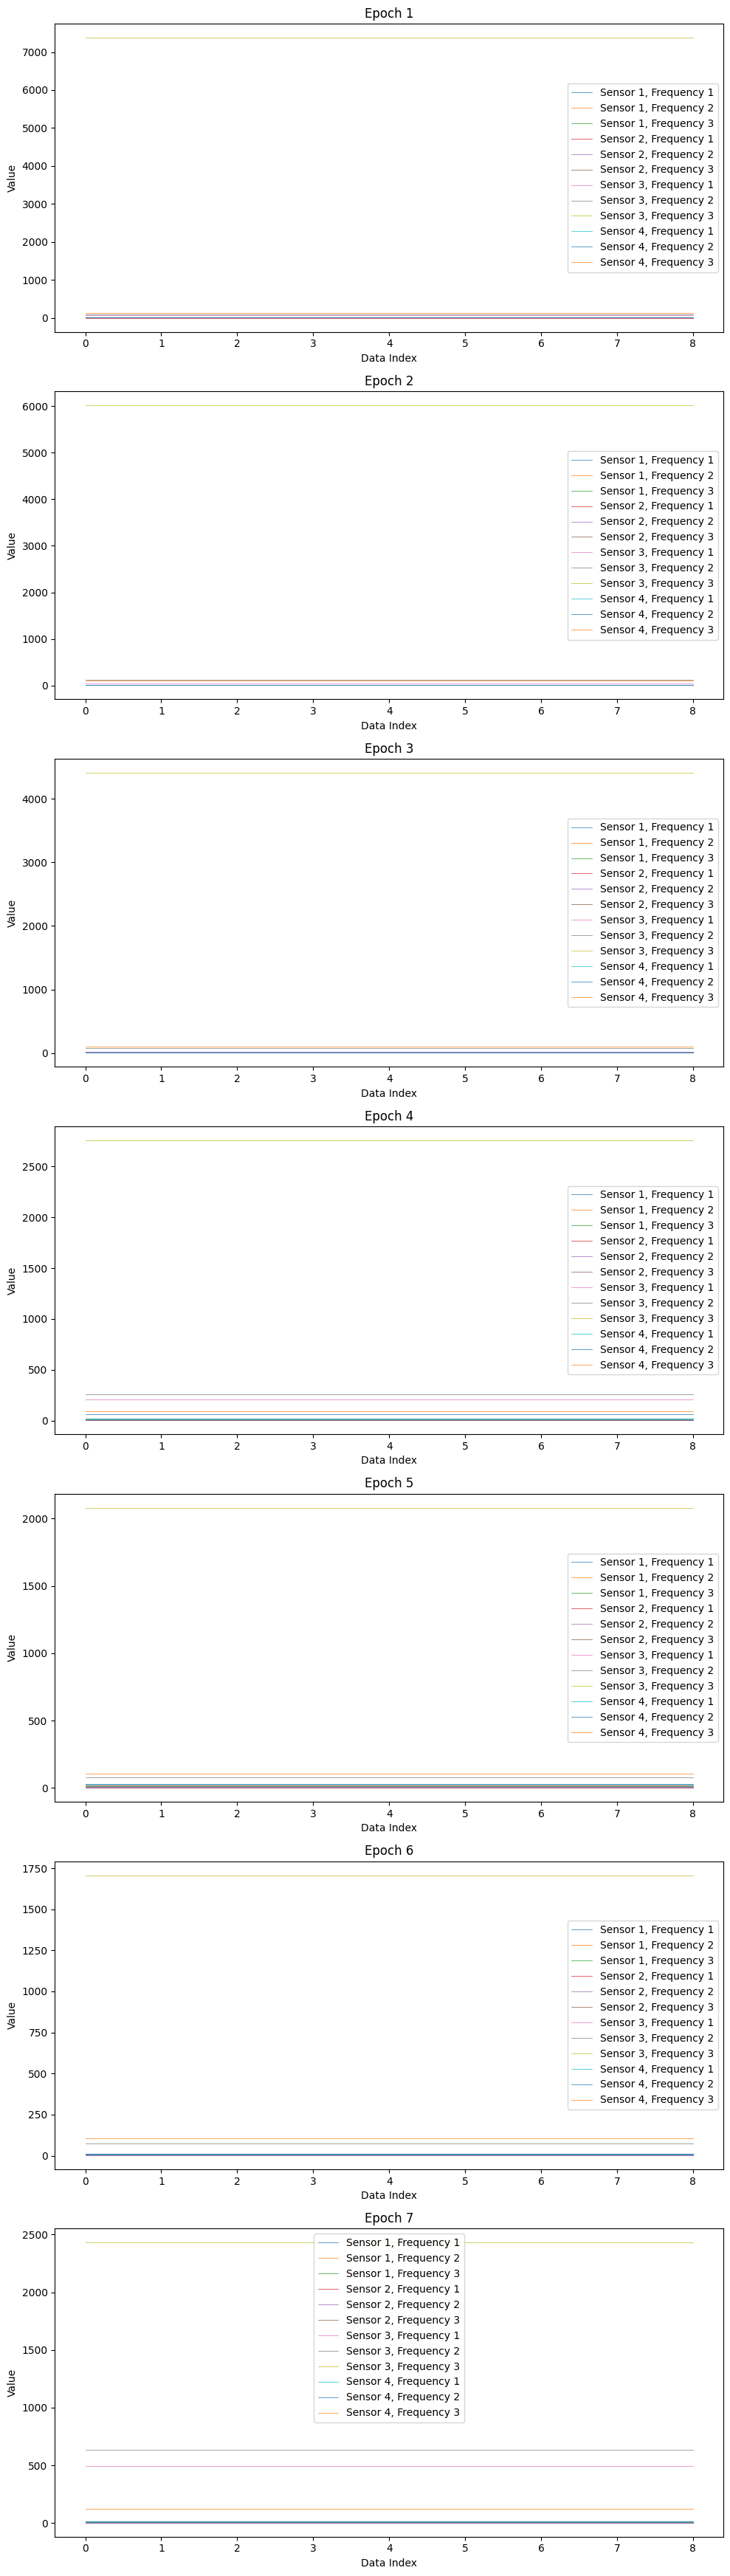

In [260]:
fig, axs = plt.subplots(n_epochs, 1, figsize=(10, n_epochs*5))

# Parcourez les sous-ensembles d'époques et tracez les courbes correspondantes
for i, epoch_data in enumerate(epochs):
    # print(f"Epoch {i+1}: {epoch_data.shape}")
    capt = np.split(epoch_data, n_capt, axis=1)  
    for j, capt_data in enumerate(capt):
        # print(f"Capt {j+1}: {capt_data.shape}")
        freq = np.split(capt_data, n_frequencies, axis=1)
        for k, freq_data in enumerate(freq):
            # print(f"Freq {k+1}: {freq_data.shape}")
            
            axs[i].plot(freq_data, label=f'Sensor {j+1}, Frequency {k+1}',linewidth=0.5)
    axs[i].set_xlabel('Data Index')
    axs[i].set_ylabel('Value')
    axs[i].set_title(f'Epoch {i+1}')
    axs[i].legend()

plt.tight_layout()
plt.show()
plt.close()